In [1]:
import pandas as pd

# Ganti 'file_path.csv' dengan jalur file CSV sesuai kebutuhan Anda
file_path = r"C:\Users\daffa\OneDrive\Documents\Kuliah\Semester 7\ML\week 9\Salary_Data.csv"

# Membaca file CSV menjadi DataFrame
df = pd.read_csv(file_path)

# Tampilkan DataFrame
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [3]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [4]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [5]:
# Menghapus baris dengan data hilang
df.dropna(inplace = True)

In [6]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [7]:
from sklearn.preprocessing import OrdinalEncoder
# create an instance of the OrdinalEncoder class
encoder = OrdinalEncoder()

# fit the encoder to the non-numerical column
encoder.fit(df[['Gender' , 'Job Title' , "Education Level"]])

# apply the encoder to the non-numerical column
df[['Gender' , 'Job Title' , "Education Level"]]= encoder.transform(df[['Gender' , 'Job Title' , "Education Level"]])

In [8]:
# Import library
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Data
# Gantilah bagian ini dengan data Anda
X = df['Years of Experience'].values.reshape(-1, 1)
y = df['Salary'].values

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
#svR 
model = SVR()

# fit the line 
model.fit(X_train , y_train)

#predict the target 
y_pred = model.predict(X_test)

In [10]:
# compute MAE between y_true and y_pred
mae_svr = mean_absolute_error(y_test, y_pred)
round (mae_svr , 2)

45430.95

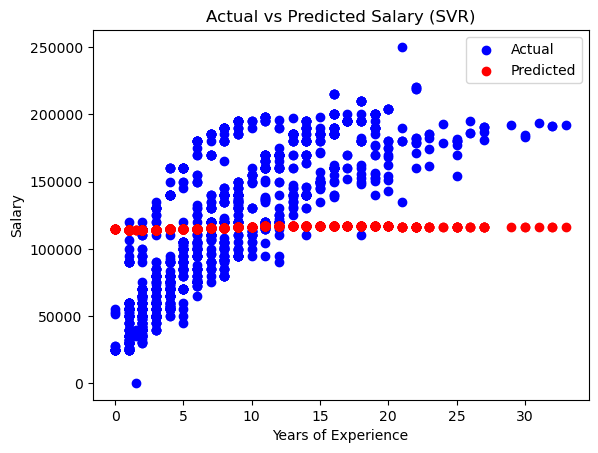

In [12]:
import matplotlib.pyplot as plt
# Plot actual vs predicted values
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Actual vs Predicted Salary (SVR)')
plt.legend()
plt.show()

In [13]:
from sklearn.model_selection import GridSearchCV

# Tentukan hyperparameter yang akan diuji
param_grid = {
    'kernel': ['rbf'],
    'C': [1000, 10000, 100000],
    'gamma': [0.5, 0.05, 0.005]
}

# Gunakan GridSearchCV untuk mencari parameter terbaik
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Tampilkan parameter terbaik
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Gunakan model terbaik untuk membuat prediksi
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

Best Parameters: {'C': 10000, 'gamma': 0.5, 'kernel': 'rbf'}
Mean Squared Error on Test Set: 768557796.030189


In [14]:
model_baru = SVR(C=100000, gamma=0.005, kernel='rbf')
model_baru.fit(X_train,y_train)

SVR(C=100000, gamma=0.005)

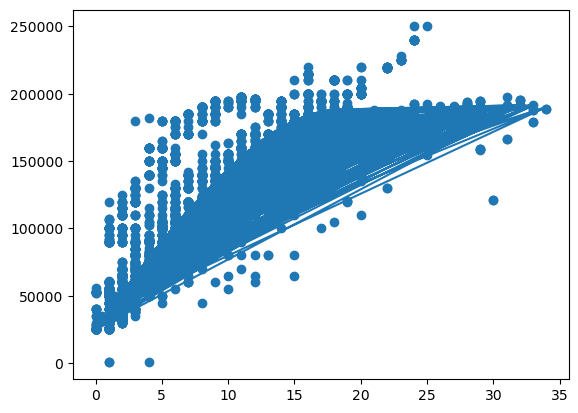

In [15]:
#visualisasikan model

plt.scatter(X_train, y_train)
plt.plot(X_train, model_baru.predict(X_train))